In [1]:
from pathlib import Path
from health_lifestyle_diabetes.infrastructure.utils.config_loader import YamlConfigLoader
from health_lifestyle_diabetes.infrastructure.utils.paths import get_repository_root
from health_lifestyle_diabetes.infrastructure.logger.config import configure_logging
from health_lifestyle_diabetes.infrastructure.logger.loguru_logger import LoguruLogger
from health_lifestyle_diabetes.infrastructure.data_sources.csv_dataset_repository import CSVDatasetRepository 

# Configure logging
configure_logging(env="dev")

# Get repository root path
root = get_repository_root()

# Load configuration
config_loader = YamlConfigLoader()
paths = config_loader.load_config(f"{root}/configs/paths.yaml")
train_paths = get_repository_root() / Path(paths["data"]["input"]["train_dataset"])

# Initialize Logger
logger = LoguruLogger()

# Load Dataset fron CSV file
csv_repo = CSVDatasetRepository(logger=logger,source_path=train_paths) 

# Lit le fichier CSV et le charge en mémoire (DataFrame Pandas).
data = csv_repo.load_dataset()

# Show the 5 first rows
display(data.head()) # Affiche les 5 premières lignes pour validation.
print(f"le dataset chargé a {data.shape[0]} lignes et {data.shape[1]} colonnes")

2026-01-02 16:37:44 | INFO     | config.py:67 | configure_logging() | Loguru configuré avec succès (mode: dev) | {'env': 'dev'}
2026-01-02 16:37:44 | INFO     | csv_dataset_repository.py:54 | load_dataset() | Chargement du dataset depuis : /Users/surelmanda/Downloads/ml-projects/Clean-Architecture-MLops/health_lifestyle_diabetes/data/input/train.csv | {}
2026-01-02 16:37:44 | INFO     | csv_dataset_repository.py:61 | load_dataset() | Dataset chargé avec succès (82702 lignes, 31 colonnes). | {}


,Age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,65,Female,Asian,Postgraduate,Low,Student,Current,0,254,7.1,...,64,78,197,104,146,9.50,6.01,23.3,Pre-Diabetes,0
1,46,Female,White,Graduate,Low,Employed,Never,2,94,6.6,...,57,148,197,124,205,10.56,7.42,43.3,Type 2,1
2,67,Female,White,Highschool,Upper-Middle,Employed,Never,3,48,4.0,...,39,68,81,133,191,5.51,7.81,35.7,Type 2,1
3,88,Female,White,Postgraduate,Lower-Middle,Retired,Never,4,30,7.9,...,42,154,131,122,169,9.42,6.81,55.7,Type 2,1
4,66,Male,White,Highschool,Middle,Employed,Never,4,86,5.1,...,66,90,95,95,123,6.48,5.51,31.8,No Diabetes,0


le dataset chargé a 82702 lignes et 31 colonnes


In [2]:
from health_lifestyle_diabetes.infrastructure.feature_engineering.pipeline_feature_engineering import FeatureEngineeringPipeline

pipeline = FeatureEngineeringPipeline(logger=LoguruLogger())
df_enriched = pipeline.transform(data)

# Affiche les 5 premières lignes du dataset enrichi pour validation.
display(df_enriched.head())
print(f"Le dataset d'entrainement initial avait {data.shape[1]} colonnes")
print(f"Le dataset d'entrainement fianla apres FE a desormais {df_enriched.shape[1]} colonnes")

2026-01-02 16:37:44 | INFO     | pipeline_feature_engineering.py:82 | transform() | Démarrage du pipeline complet de Feature Engineering... | {}
2026-01-02 16:37:44 | INFO     | exclusion.py:36 | drop_leakage_columns() | Vérification des colonnes à risque de data leakage... | {}
2026-01-02 16:37:44 | INFO     | exclusion.py:40 | drop_leakage_columns() | Suppression des colonnes à risque de leakage : ['diabetes_risk_score', 'diabetes_stage'] | {}
2026-01-02 16:37:44 | INFO     | base_preprocessing.py:25 | clean_categorical_variables() | Nettoyage des variables catégorielles... | {}
2026-01-02 16:37:44 | INFO     | base_preprocessing.py:32 | clean_categorical_variables() | Libellés uniformisés avec succès. | {}
2026-01-02 16:37:44 | INFO     | demographics_features.py:82 | transform() | Création des variables démographiques... | {}
2026-01-02 16:37:44 | INFO     | demographics_features.py:68 | _create_age_group() | Utilisation du découpage d'âge en 3 catégories. | {}
2026-01-02 16:37:44 

,Age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,glucose_diff,glycemic_load,dyslipidemia_flag,cardiometabolic_burden_score,bp_ratio,activity_adequacy_ratio,screen_sleep_ratio,sedentary_risk_flag,lifestyle_score,sleep_efficiency
0,65,Female,Asian,Postgraduate,Low,Student,Current,0,254,7.1,...,42,2600.0,1,1,1.587500,1.693333,0.290323,0,6,2.000000
1,46,Female,White,Graduate,Low,Employed,Never,2,94,6.6,...,81,3236.4,1,2,1.577465,0.626667,1.350000,1,6,0.659341
2,67,Female,White,Highschool,Upper-Middle,Employed,Never,3,48,4.0,...,58,3192.0,1,2,1.785714,0.320000,0.876712,1,4,0.986486
3,88,Female,White,Postgraduate,Lower-Middle,Inactive,Never,4,30,7.9,...,47,2903.6,0,2,1.552941,0.200000,0.464789,0,6,1.651163
4,66,Male,White,Highschool,Middle,Employed,Never,4,86,5.1,...,28,2451.0,0,0,1.525641,0.573333,1.042857,1,4,0.843373


Le dataset d'entrainement initial avait 31 colonnes
Le dataset d'entrainement fianla apres FE a desormais 52 colonnes
2026-01-02 16:37:45 | INFO     | pipeline_feature_engineering.py:120 | transform() | Pipeline exécuté avec succès. Nombre total de colonnes : 52 | {}


In [3]:
from health_lifestyle_diabetes.infrastructure.utils.config_loader import YamlConfigLoader
from health_lifestyle_diabetes.infrastructure.utils.paths import get_repository_root
from health_lifestyle_diabetes.infrastructure.logger.loguru_logger import LoguruLogger
from health_lifestyle_diabetes.infrastructure.splitters.sklearn_splitter import SklearnDatasetSplitter

# Load configuration
config_loader = YamlConfigLoader()
cfg = config_loader.load_config(f"{get_repository_root()}/configs/splitter.yaml")
print(f"Splitter configuration: {cfg['splitter']}")

logger = LoguruLogger()

splitter = SklearnDatasetSplitter(
    train_size=cfg["splitter"]["train_size"],
    target_column=cfg["splitter"]["target_column"],
    random_state=cfg["splitter"]["random_state"],
    logger=logger,
)
train_df_enriched, valid_df_enriched = splitter.split(df_enriched)
print("Dataset successfully split into training and validation sets.\n")
print(f"Train set shape: {train_df_enriched.shape}")
print(f"Validation set shape: {valid_df_enriched.shape}")

Splitter configuration: {'train_size': 0.85, 'target_column': 'diagnosed_diabetes', 'random_state': 42}
2026-01-02 16:37:47 | DEBUG    | sklearn_splitter.py:37 | __init__() | SklearnDatasetSplitter initialized | {}
2026-01-02 16:37:47 | INFO     | sklearn_splitter.py:42 | split() | Starting dataset split | {}
Dataset successfully split into training and validation sets.
2026-01-02 16:37:47 | INFO     | sklearn_splitter.py:57 | split() | Split done | train=(70296, 52) | test=(12406, 52) | {}

Train set shape: (70296, 52)
Validation set shape: (12406, 52)


In [4]:
# Étape 4.1 : Répartition finale des datasets
print("Étape 4.1 : Répartition finale des lignes du dataset :")
print(f"- Entraînement final (train_df_enriched) : {train_df_enriched.shape[0]} lignes")
print(f"- Validation (valid_df_enriched) : {valid_df_enriched.shape[0]} lignes")


print("*" * 100)

# Étape 5.1 : Définition de la variable cible
TARGET = cfg["splitter"]["target_column"]

# Étape 5.2 : Création des matrices X (features) et des vecteurs y (target) pour chaque set
# Pour l'entraînement final
X_train = train_df_enriched.drop(columns=[TARGET])
y_train = train_df_enriched[TARGET]

# Pour la validation
X_valid = valid_df_enriched.drop(columns=[TARGET])
y_valid = valid_df_enriched[TARGET]

# Affichage des dimensions des matrices et vecteurs
print("Étape 5.3 : Dimensions finales des matrices de caractéristiques (X) :")
print(f"- X_train (Features d'entraînement) : {X_train.shape[0]} lignes, {X_train.shape[1]} colonnes")
print(f"- X_valid (Features de validation)  : {X_valid.shape[0]} lignes, {X_valid.shape[1]} colonnes")

print("\nÉtape 5.4 : Vérification des vecteurs cibles (y) :")
print(f"- y_train : {y_train.shape[0]} lignes")
print(f"- y_valid : {y_valid.shape[0]} lignes")

Étape 4.1 : Répartition finale des lignes du dataset :
- Entraînement final (train_df_enriched) : 70296 lignes
- Validation (valid_df_enriched) : 12406 lignes
****************************************************************************************************
Étape 5.3 : Dimensions finales des matrices de caractéristiques (X) :
- X_train (Features d'entraînement) : 70296 lignes, 51 colonnes
- X_valid (Features de validation)  : 12406 lignes, 51 colonnes

Étape 5.4 : Vérification des vecteurs cibles (y) :
- y_train : 70296 lignes
- y_valid : 12406 lignes


In [5]:
from health_lifestyle_diabetes.infrastructure.model_trainers.catboost_trainer import (
    CatBoostTrainer,
)


# =========================
# Paramètres CatBoost
# =========================
catboost_params = {
    "iterations": 200,
    "learning_rate": 0.1,
    "depth": 6,
    "loss_function": "Logloss",
    "eval_metric": "Logloss",  #"AUC"
    "verbose": 100,   # ← test du verbose
}

# =========================
# Entraînement
# =========================
trainer = CatBoostTrainer(params=catboost_params,logger = LoguruLogger())

model = trainer.train(
    X_train=X_train,
    y_train=y_train,
    X_valid=X_valid,
    y_valid=y_valid,
)

print("Modèle entraîné :", model)


2026-01-02 16:37:47 | INFO     | catboost_trainer.py:38 | __init__() | CatBoostTrainer initialisé avec les paramètres fournis. | {}
2026-01-02 16:37:47 | INFO     | catboost_trainer.py:111 | train() | Entraînement CatBoost | train_shape=(70296, 51) | valid_shape=(12406, 51) | {}
2026-01-02 16:37:47 | INFO     | catboost_trainer.py:127 | train() | Détection automatique des variables catégorielles : ['gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 'smoking_status', 'age_group', 'glucose_status', 'hba1c_category', 'bmi_category', 'bp_category'] | {}
2026-01-02 16:37:47 | INFO     | catboost_trainer.py:137 | train() | Démarrage de l'entraînement CatBoost. | {}
0:	learn: 0.4963352	test: 0.4967557	best: 0.4967557 (0)	total: 115ms	remaining: 22.8s
100:	learn: 0.2047797	test: 0.2144090	best: 0.2143517 (94)	total: 4.8s	remaining: 4.7s
199:	learn: 0.1976694	test: 0.2149104	best: 0.2143145 (123)	total: 9.36s	remaining: 0us

bestTest = 0.2143144506
bestIteration = 12

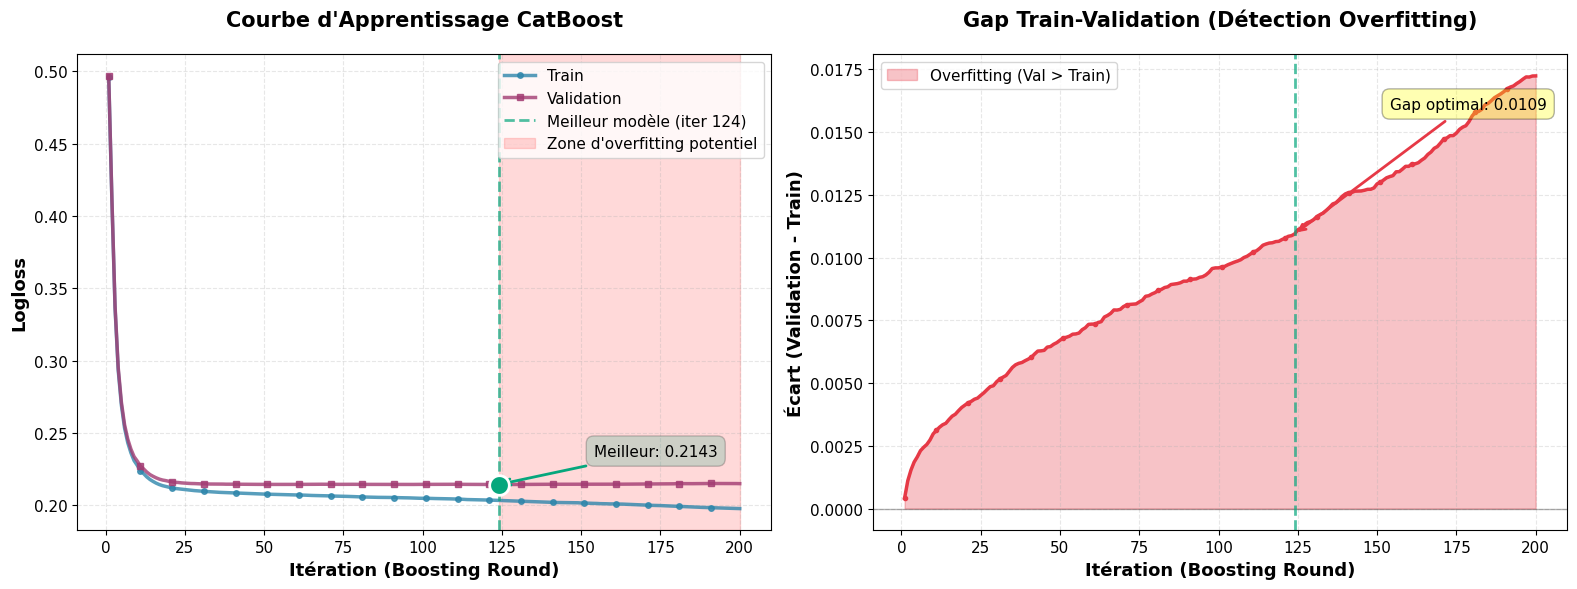

In [6]:
from health_lifestyle_diabetes.infrastructure.training_diagnostics.diagnostics import (
    BoostingTrainingDiagnostics,
)
from health_lifestyle_diabetes.infrastructure.tracking.run_name_generator import generate_run_name

# ============================================================
# 5.) Plot des diagnostics d'entraînement
# ============================================================
EXPERIMENT_NAME = "health_lifestyle_diabetes"
RUN_NAME = generate_run_name(prefix="CATB")
MODEL_NAME = "CatBoost"

diagnostics = BoostingTrainingDiagnostics(
    model=model,
    model_name=MODEL_NAME,
    run_name=RUN_NAME,
)

diagnostics.run(
    backend="matplotlib",      # "matplotlib" ou "plotly"
    save_figure=True,
)


In [9]:
from health_lifestyle_diabetes.infrastructure.metrics.sklearn_metrics_adapter import SklearnMetricsAdapter
from health_lifestyle_diabetes.application.services.evaluation_service import EvaluationService

# Probabilités prédites par ton modèle
y_proba = model.predict_proba(X_valid)[:, 1]
y_true = y_valid

# Injection de dépendances
metrics_adapter = SklearnMetricsAdapter()
evaluator = EvaluationService(metrics_adapter)

results = evaluator.evaluate(y_true, y_proba, threshold=0.5)
print(results)

EvaluationResults(auc_roc=0.9445, auc_pr=0.9722, accuracy=0.9195, precision=1.0, recall=0.8658, f1=0.9281, false_positive_rate=None, false_negative_rate=None, kappa=0.8377, mcc=0.8489, extra_metrics={'accuracy': 0.9195, 'precision': 1.0, 'recall': 0.8658, 'f1': 0.9281, 'auc_roc': 0.9445, 'auc_pr': 0.9722, 'false_positive_rate': 0.0, 'false_negative_rate': 0.1342, 'kappa': 0.8377, 'mcc': 0.8489})


In [10]:
extra = results.extra_metrics
print(extra)

{'accuracy': 0.9195, 'precision': 1.0, 'recall': 0.8658, 'f1': 0.9281, 'auc_roc': 0.9445, 'auc_pr': 0.9722, 'false_positive_rate': 0.0, 'false_negative_rate': 0.1342, 'kappa': 0.8377, 'mcc': 0.8489}


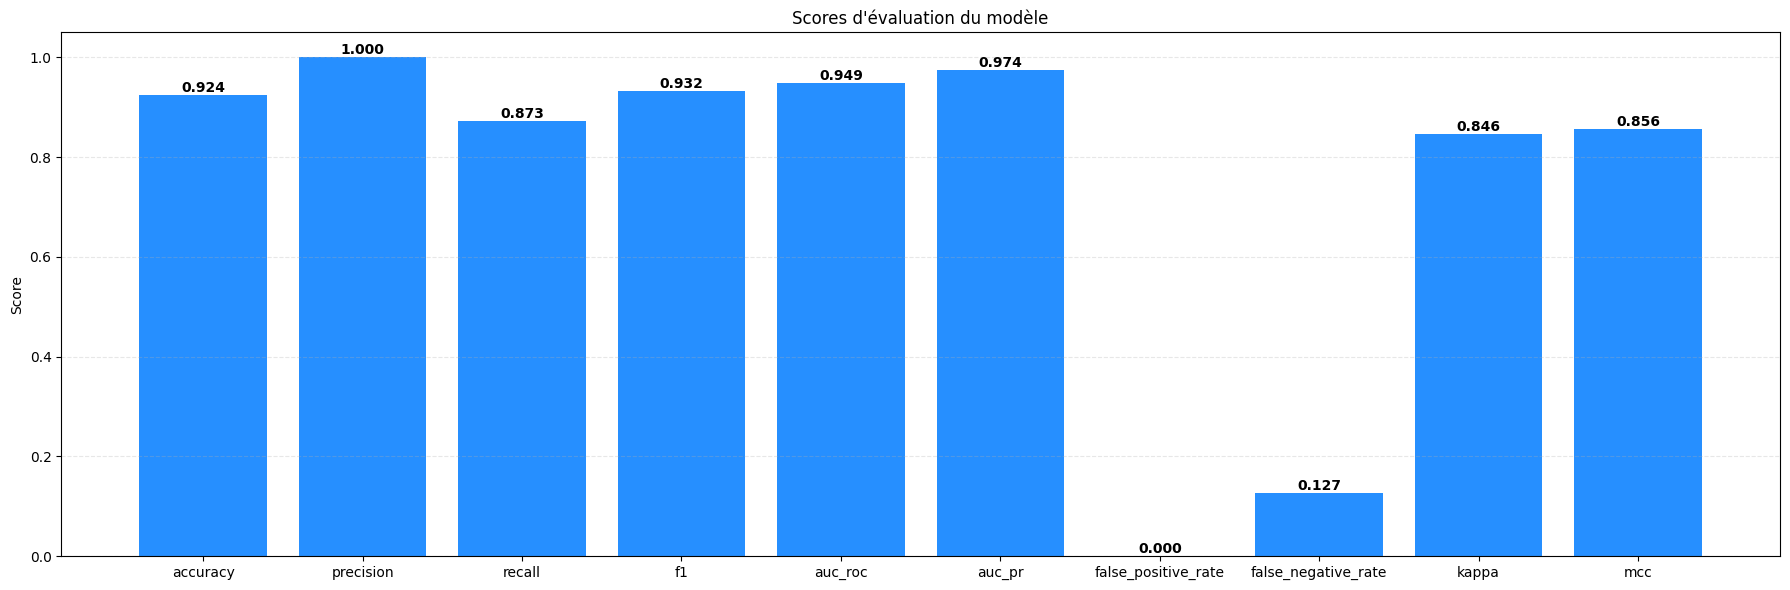

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics_bar(metrics: dict, title: str = "Model Evaluation Metrics"):
    """
    Plot simple en barres des métriques avec valeur annotée.
    """
    keys = list(metrics.keys())
    values = list(metrics.values())

    plt.figure(figsize=(18, 6))
    bars = plt.bar(keys, values, color="#007bff", alpha=0.85)

    # Rotation des labels pour lisibilité
    plt.xticks(rotation=0)

    # Affichage des valeurs au-dessus des barres
    for bar, value in zip(bars, values):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{value:.3f}",
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold"
        )

    plt.title(title)
    plt.ylabel("Score")
    plt.ylim(0, max(values) + 0.05)
    plt.grid(axis="y", linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

extra = results.extra_metrics or {}
plot_metrics_bar(extra, title="Scores d'évaluation du modèle")


main = {k: extra[k] for k in ["accuracy", "precision", "recall", "f1", "auc_roc"] if k in extra}
plot_metrics_bar(main, "Métriques principales")

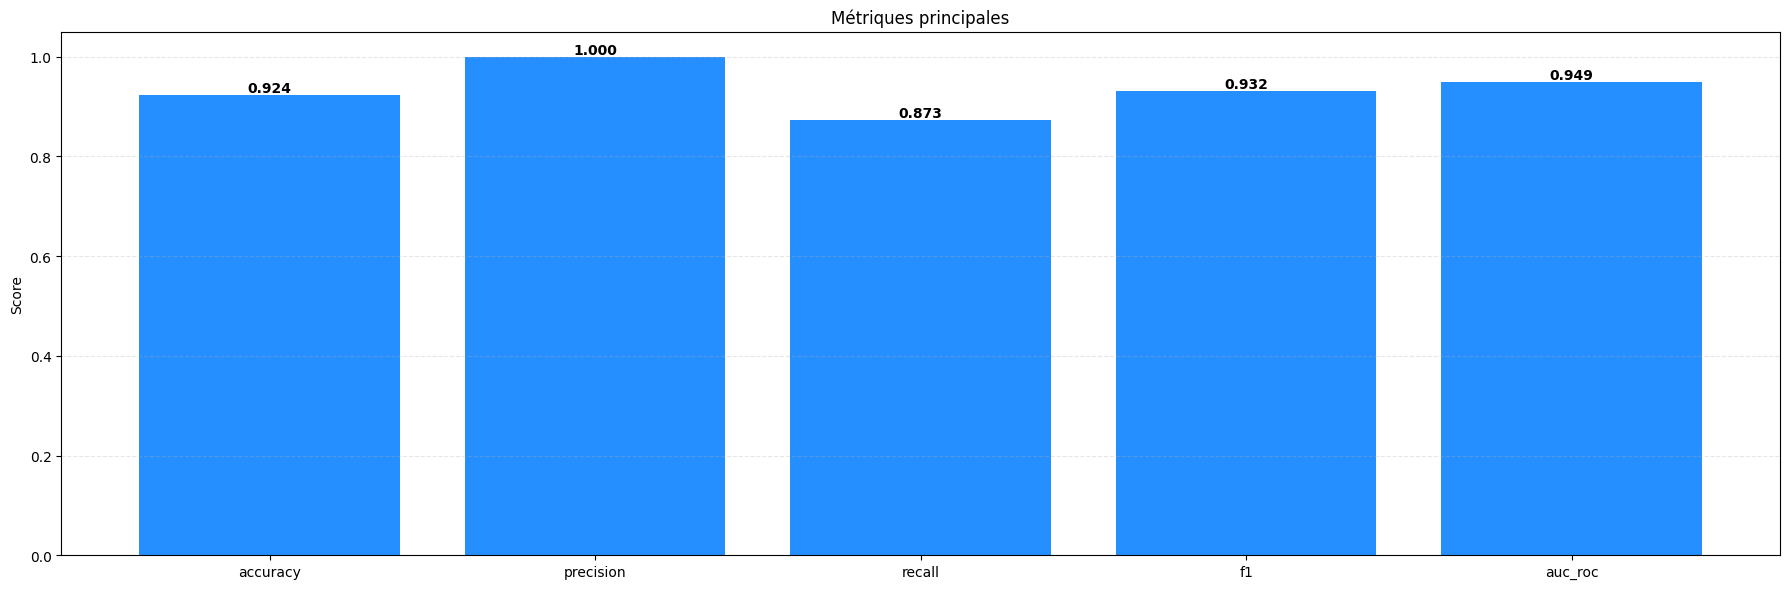

In [14]:
main = {k: extra[k] for k in ["accuracy", "precision", "recall", "f1", "auc_roc"] if k in extra}
plot_metrics_bar(main, "Métriques principales")

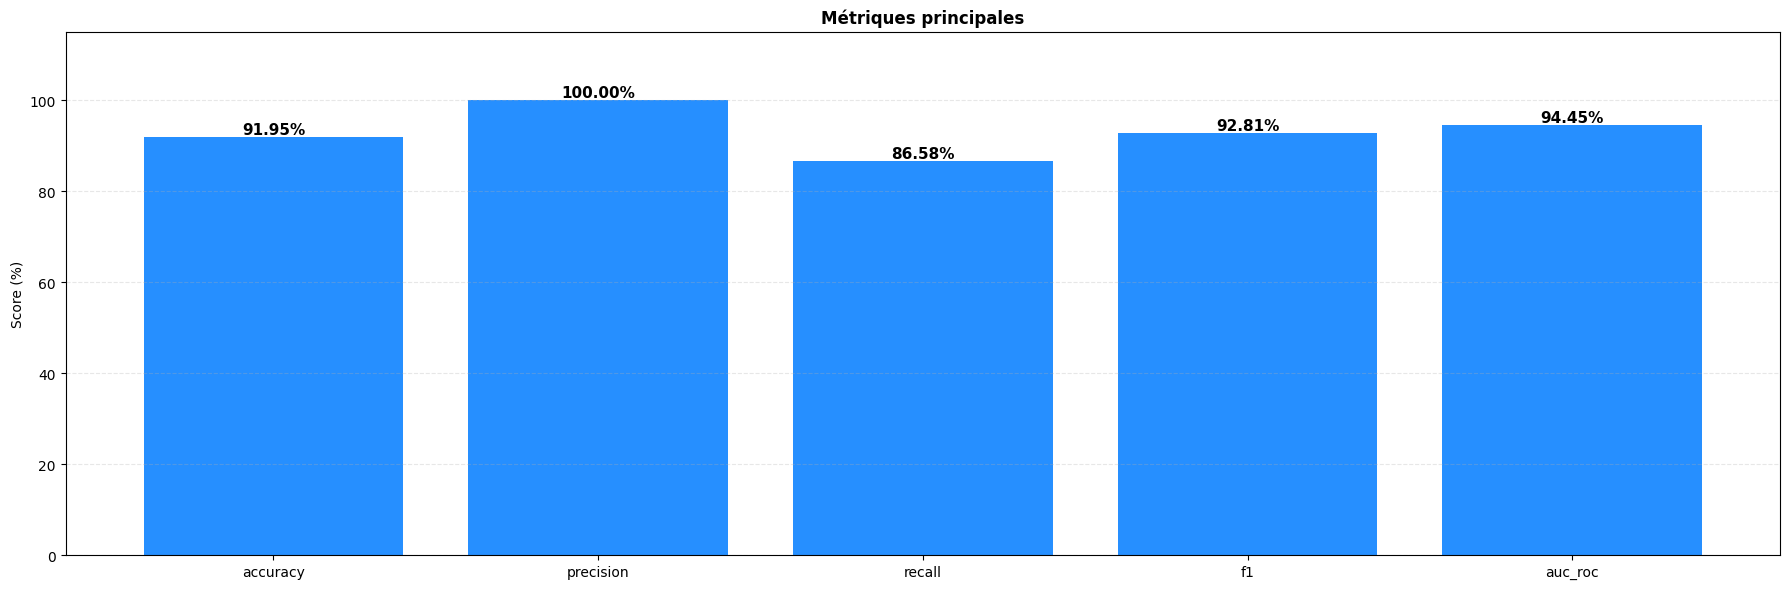

In [12]:

from health_lifestyle_diabetes.infrastructure.visualization.matplotlib_metrics_plotter import (
    MatplotlibMetricsPlotter,
)

logger = LoguruLogger()

plotter = MatplotlibMetricsPlotter(logger)

plotter.plot_metrics(
    results.extra_metrics,
    title="Métriques principales",
)

In [13]:

from health_lifestyle_diabetes.infrastructure.visualization.plotly_metrics_plotter import (
    PlotlyMetricsPlotter,
)

logger = LoguruLogger()

plotter = PlotlyMetricsPlotter(logger)

plotter.plot_metrics(
    results.extra_metrics,
    title="Métriques principales",
)

In [ ]:
from health_lifestyle_diabetes.infrastructure.metrics.sklearn_metrics_adapter import (
    SklearnMetricsAdapter,
)

from health_lifestyle_diabetes.application.services.evaluation_service import EvaluationService

from health_lifestyle_diabetes.infrastructure.visualization.matplotlib_metrics_plotter import (
    MatplotlibMetricsPlotter,
)
from health_lifestyle_diabetes.infrastructure.logger.loguru_logger import (
    LoguruLogger,
)
from health_lifestyle_diabetes.application.use_cases.evaluate_model_uc import (
    EvaluateModelUseCase,
)

# Données
y_proba = model.predict_proba(X_valid)[:, 1]
y_true = y_valid

# Injection
logger = LoguruLogger()
metrics_adapter = SklearnMetricsAdapter()
evaluation_service = EvaluationService(metrics_adapter)
plotter = MatplotlibMetricsPlotter(logger)

use_case = EvaluateModelUseCase(
    evaluation_service=evaluation_service,
    logger=logger,
    metrics_plotter=plotter,
)

# Exécution
results = use_case.execute(
    y_true=y_true,
    y_proba=y_proba,
    plot_metrics=True,
)

results

In [ ]:
from health_lifestyle_diabetes.infrastructure.visualization.plotly_metrics_plotter import (
    PlotlyMetricsPlotter,
)

plotter = PlotlyMetricsPlotter(logger)

use_case = EvaluateModelUseCase(
    evaluation_service=evaluation_service,
    logger=logger,
    metrics_plotter=plotter,
)

results = use_case.execute(
    y_true=y_true,
    y_proba=y_proba,
    plot_metrics=True,
    selected_metrics=["recall", "precision", "f1", "mcc"],
    plot_title="Métriques critiques (Plotly)",
)

In [ ]:
from health_lifestyle_diabetes.infrastructure.metrics.sklearn_metrics_adapter import SklearnMetricsAdapter
from health_lifestyle_diabetes.application.services.evaluation_service import EvaluationService

from health_lifestyle_diabetes.infrastructure.visualization.plotly_metrics_plotter import (
    PlotlyMetricsPlotter,
)
from health_lifestyle_diabetes.infrastructure.visualization.matplotlib_metrics_plotter import (
    MatplotlibMetricsPlotter,
)
from health_lifestyle_diabetes.infrastructure.logger.loguru_logger import LoguruLogger

# Probabilités prédites par ton modèle
y_proba = model.predict_proba(X_valid)[:, 1]
y_true = y_valid

# Injection de dépendances
metrics_adapter = SklearnMetricsAdapter()
evaluator = EvaluationService(metrics_adapter)

results = evaluator.evaluate(y_true, y_proba, threshold=0.5)
print(results)


logger = LoguruLogger()

plotter = MatplotlibMetricsPlotter(logger)

plotter.plot_metrics(
    results.extra_metrics,
    title="Métriques principales",
)


from health_lifestyle_diabetes.infrastructure.visualization.plotly_metrics_plotter import (
    PlotlyMetricsPlotter,
)

logger = LoguruLogger()

plotter = PlotlyMetricsPlotter(logger)

plotter.plot_metrics(
    results.extra_metrics,
    title="Métriques principales",
)

In [ ]:
from health_lifestyle_diabetes.infrastructure.visualization.matplotlib_metrics_plotter import (
    MatplotlibMetricsPlotter,
)

plotter = MatplotlibMetricsPlotter()

use_case = EvaluateModelUseCase(
    evaluation_service=evaluation_service,
    metrics_plotter=plotter,
)

2025-12-26 16:13:58 | INFO     | config.py:67 | configure_logging() | Loguru configuré avec succès (mode: dev) | {'env': 'dev'}
2025-12-26 16:13:58 | DEBUG    | mlflow_setup.py:36 | __init__() | Tracking URI : sqlite://///Users/surelmanda/Downloads/ml-projects/mlflow_central/db/mlruns.db | {}
2025-12-26 16:13:58 | DEBUG    | mlflow_setup.py:37 | __init__() | Artifact URI : /Users/surelmanda/Downloads/ml-projects/mlflow_central/mlflow_artifacts | {}
2025-12-26 16:13:58 | INFO     | mlflow_setup.py:53 | configure() | MLflow configuré avec succès. | {}
Starting experiment 'health_lifestyle_diabetes' with run name 'CatBoost'
2025-12-26 16:13:58 | INFO     | mlflow_tracker.py:25 | __init__() | MLflowExperimentTracker prêt. | {}
2025-12-26 16:13:58 | INFO     | experiment_tracking_service.py:23 | __init__() | ExperimentTrackingService initialisé. | {}
2025-12-26 16:13:58 | INFO     | experiment_tracking_service.py:30 | start_experiment() | Initialisation de l'expérience 'health_lifestyle_dia

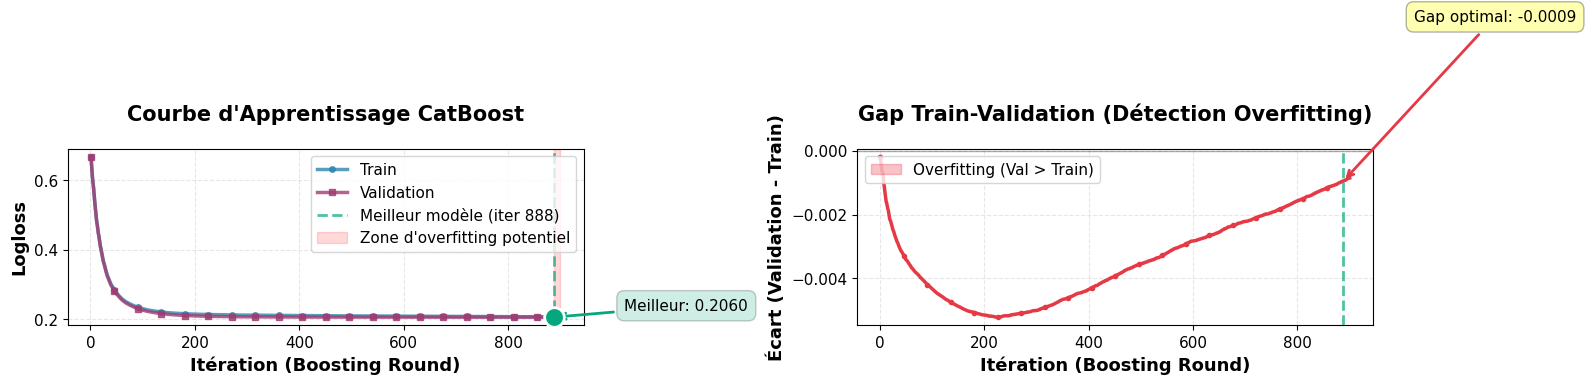

2025-12-26 16:14:58 | INFO     | experiment_tracking_service.py:61 | close() | Fermeture de l'expérience. | {}
2025-12-26 16:14:58 | INFO     | mlflow_tracker.py:76 | end_run() | Fermeture de la run : 310c726bc3e44fd19667e5eaa77b4d9a | {}

Exécution terminée. Vérifier MLflow UI.


In [21]:
# ============================================================
# 0) Imports - Dépendances Clean Architecture
# ============================================================
from fastapi import params
from health_lifestyle_diabetes.infrastructure.logger.config import configure_logging
from health_lifestyle_diabetes.infrastructure.logger.loguru_logger import LoguruLogger
from health_lifestyle_diabetes.infrastructure.tracking.mlflow_tracker import MLflowExperimentTracker
from health_lifestyle_diabetes.application.services.experiment_tracking_service import ExperimentTrackingService
from health_lifestyle_diabetes.infrastructure.tracking.run_name_generator import generate_run_name
from health_lifestyle_diabetes.infrastructure.model_trainers.catboost_trainer import (
    CatBoostTrainer,
)
from health_lifestyle_diabetes.infrastructure.training_diagnostics.diagnostics import (
    BoostingTrainingDiagnostics,
)

# ============================================================
# 1.) Config log + injection dépendances
# ============================================================
configure_logging(env="dev")

logger = LoguruLogger()
tracker = MLflowExperimentTracker(logger=logger)
tracking_service = ExperimentTrackingService(tracker=tracker, logger=logger)

# ============================================================
# 2.) Démarrer une expérience CatBoost dans MLflow
# ============================================================
EXPERIMENT_NAME = "health_lifestyle_diabetes"
RUN_NAME = generate_run_name(prefix="CATB")
MODEL_NAME = "CatBoost"
print(f"Starting experiment '{EXPERIMENT_NAME}' with run name '{MODEL_NAME}'")


tracking_service.start_experiment(
    experiment_name=EXPERIMENT_NAME,
    run_name=RUN_NAME
)

# ============================================================
# 4) Définition du modèle + log des paramètres
# ============================================================
# =========================
# Paramètres CatBoost
# =========================
catboost_params = {
    "iterations": 900,
    "learning_rate": 0.01,
    "depth": 6,
    "loss_function": "Logloss",
    "eval_metric": "AUC",  #"AUC"
    "verbose": 100,   # ← test du verbose
}
# Tracking des paramètres sur l'expérience mlflow
tracking_service.log_training_context(model_name=MODEL_NAME, params=catboost_params)
# =========================
# Entraînement
# =========================
trainer = CatBoostTrainer(params=catboost_params,logger=logger)
model = trainer.train(
    X_train=X_train,
    y_train=y_train,
    X_valid=X_valid,
    y_valid=y_valid,
)

print("Modèle entraîné :", model)


# ============================================================
# 5.) Plot des diagnostics d'entraînement
# ============================================================
diagnostics = BoostingTrainingDiagnostics(
    model=model,
    model_name=MODEL_NAME,
    run_name=RUN_NAME,
)

diagnostics.run(
    backend="matplotlib",  # "matplotlib" ou "plotly"
    save_figure=True,
)

# ============================================================
# 6.) Évaluation du modèle sur le jeu de validation
# ============================================================
from health_lifestyle_diabetes.infrastructure.metrics.sklearn_metrics_adapter import SklearnMetricsAdapter
from health_lifestyle_diabetes.application.services.evaluation_service import EvaluationService

# Probabilités prédites par ton modèle
y_proba = model.predict_proba(X_valid)[:, 1]
y_true = y_valid

# Injection de dépendances
metrics_adapter = SklearnMetricsAdapter()
evaluator = EvaluationService(metrics_adapter)

# Évaluation
results = evaluator.evaluate(y_true, y_proba, threshold=0.5)
main = {k: extra[k] for k in ["accuracy", "precision", "recall", "f1", "auc_roc"] if k in extra}
plot_metrics_bar(main, "Métriques principales")

# Log evaluation metrics
tracking_service.log_evaluation(main)

# ============================================================
# 7.) Fin de l'expérience
# ============================================================
tracking_service.close()

print("\nExécution terminée. Vérifier MLflow UI.")

In [ ]:
from health_lifestyle_diabetes.infrastructure.metrics.sklearn_metrics_adapter import SklearnMetricsAdapter
from health_lifestyle_diabetes.application.services.evaluation_service import EvaluationService

# Probabilités prédites par ton modèle
y_proba = model.predict_proba(X_valid)[:, 1]
y_true = y_valid

# Injection de dépendances
metrics_adapter = SklearnMetricsAdapter()
evaluator = EvaluationService(metrics_adapter)

results = evaluator.evaluate(y_true, y_proba, threshold=0.5)
print(results)